In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_data = pd.read_csv('/content/Fashion_Retail_Sales.csv')

In [ ]:
df_data.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


In [ ]:
df_data.tail()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
3395,4118,Shorts,37.0,09-07-2023,2.7,Cash
3396,4056,Slippers,176.0,16-03-2023,2.5,Cash
3397,3991,Onesie,NaN,03-10-2022,2.4,Credit Card
3398,4042,Sandals,128.0,01-01-2023,1.8,Cash
3399,4001,Backpack,115.0,22-03-2023,1.4,Cash


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [ ]:
df_data.shape

(3400, 6)

In [ ]:
df_data.isnull().sum()

,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),650
Date Purchase,0
Review Rating,324
Payment Method,0


In [ ]:
df_data.describe()

,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,2750.000000,3076.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,419.536669,1.156505
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.000000
50%,4040.000000,110.000000,3.000000
75%,4081.000000,155.750000,4.000000
max,4122.000000,4932.000000,5.000000


In [ ]:
df_data['Payment Method'].value_counts()

,count
Payment Method,
Credit Card,1770
Cash,1630


<Axes: xlabel='Payment Method', ylabel='count'>

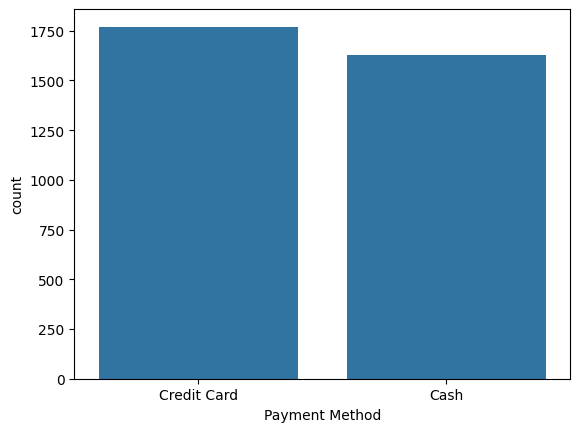

In [ ]:
sns.countplot(x='Payment Method', data=df_data)

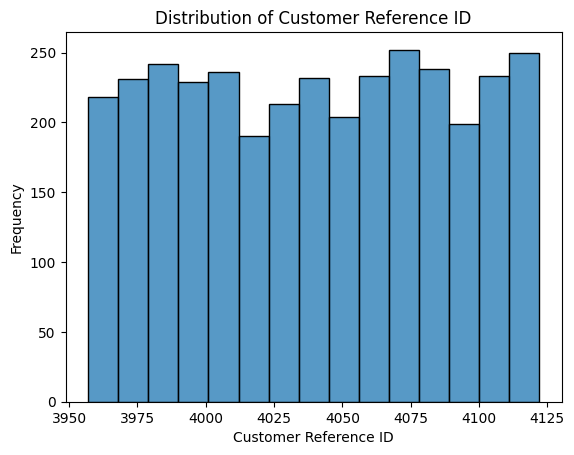

In [ ]:
sns.histplot(data=df_data, x='Customer Reference ID')
plt.title('Distribution of Customer Reference ID')
plt.xlabel('Customer Reference ID')
plt.ylabel('Frequency')
plt.show()

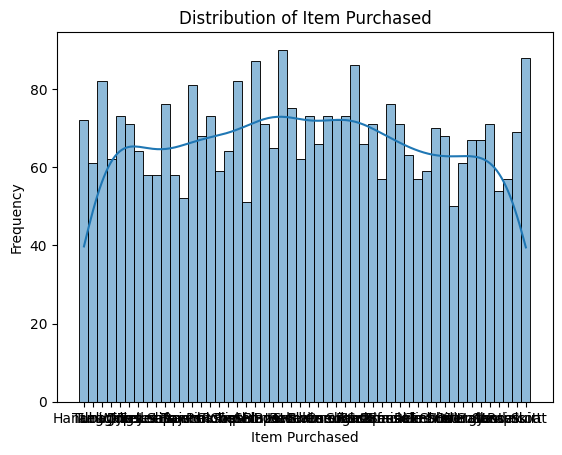

In [ ]:
sns.histplot(data=df_data, x='Item Purchased', kde=True)
plt.title('Distribution of Item Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Frequency')
plt.show()

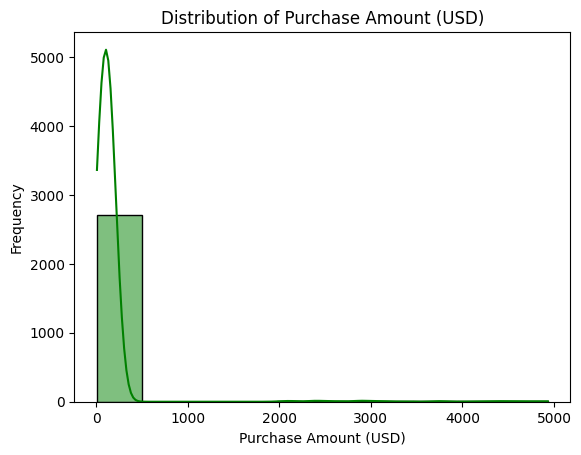

In [ ]:
sns.histplot(data=df_data, x='Purchase Amount (USD)', kde=True, bins=10, color='green')
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

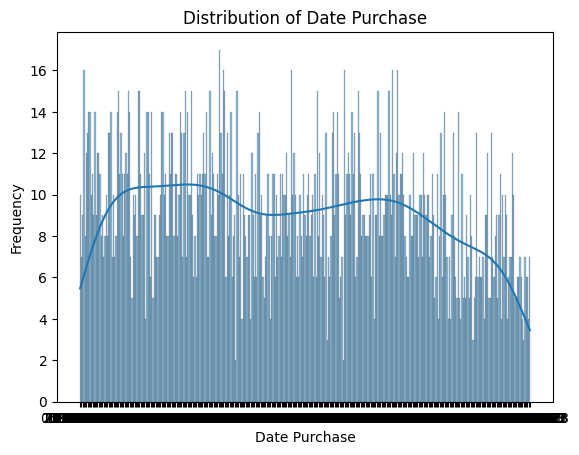

In [ ]:
sns.histplot(data=df_data, x='Date Purchase', kde=True)
plt.title('Distribution of Date Purchase')
plt.xlabel('Date Purchase')
plt.ylabel('Frequency')
plt.show()

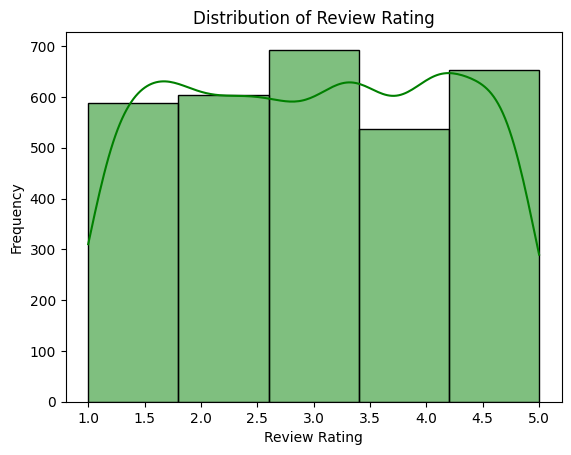

In [ ]:
sns.histplot(data=df_data, x='Review Rating', kde=True, bins=5, color='green')
plt.title('Distribution of Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

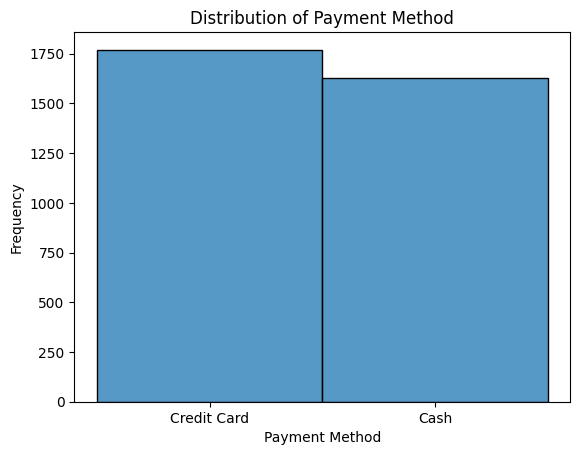

In [ ]:
sns.histplot(data=df_data, x='Payment Method')
plt.title('Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

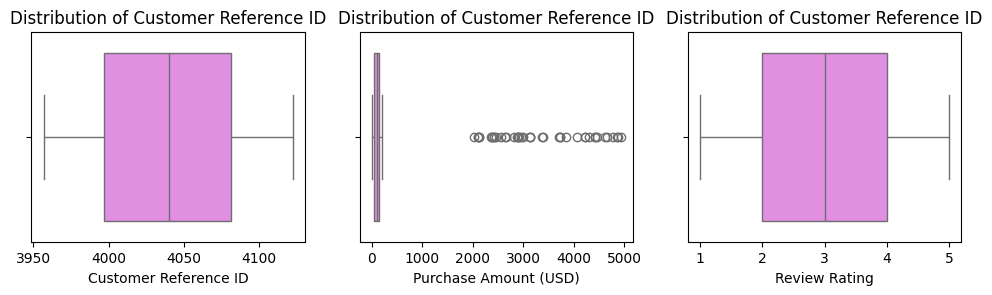

In [ ]:
numerical_columns = df_data.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_data[col], color='violet')
    plt.title(f'Distribution of {column}')

In [ ]:
skewed_features = df_data.select_dtypes(include=['number']).drop('Customer Reference ID', axis=1).skew().sort_values(ascending=False)
print(skewed_features)

Purchase Amount (USD)    8.497336
Review Rating           -0.015320
dtype: float64


In [ ]:
skewed_cols = ['Customer Refernce ID', 'Item Purchased', 'Purchase Amount (USD)', 'Date Purchase', 'Review Rating', 'Payment Method']

In [ ]:
def cap_outliers_iqr(df_data, column):
    Q1 = df_data[column].quantile(0.25)
    Q3 = df_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_data[column] = np.where(df_data[column] < lower_bound, lower_bound,
                               np.where(df_data[column] > upper_bound, upper_bound, df_data[column]))
    return df_data


In [ ]:
df_data_new = cap_outliers_iqr(df_data, 'Customer Reference ID')


In [ ]:
df_data_new

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018.0,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115.0,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019.0,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097.0,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997.0,Wallet,3003.0,27-11-2022,4.7,Cash
...,...,...,...,...,...,...
3395,4118.0,Shorts,37.0,09-07-2023,2.7,Cash
3396,4056.0,Slippers,176.0,16-03-2023,2.5,Cash
3397,3991.0,Onesie,NaN,03-10-2022,2.4,Credit Card
3398,4042.0,Sandals,128.0,01-01-2023,1.8,Cash


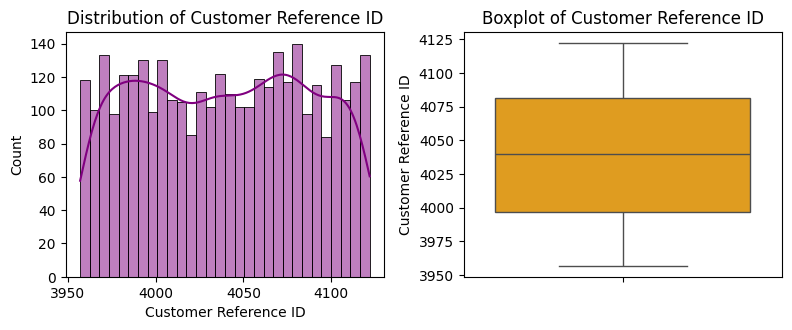

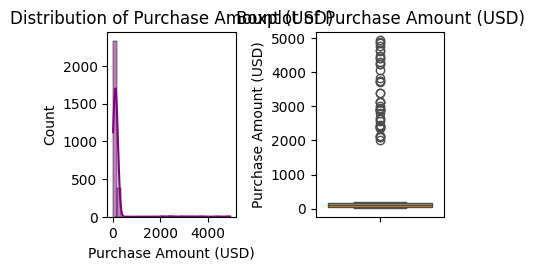

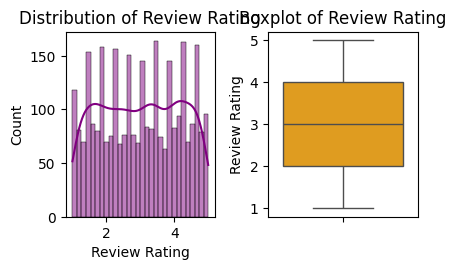

In [ ]:
num_cols = df_data.select_dtypes(include=['number']).columns
plt.figure (figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
   plt.subplot(2,3,1)
   sns.histplot(df_data_new[col], kde=True, bins=30, color='purple')
   plt.title(f'Distribution of {col}')
   plt.subplot(2,3,2)
   sns.boxplot(df_data_new[col], color='orange')
   plt.title(f'Boxplot of {col}')
   plt.tight_layout()
   plt.show()





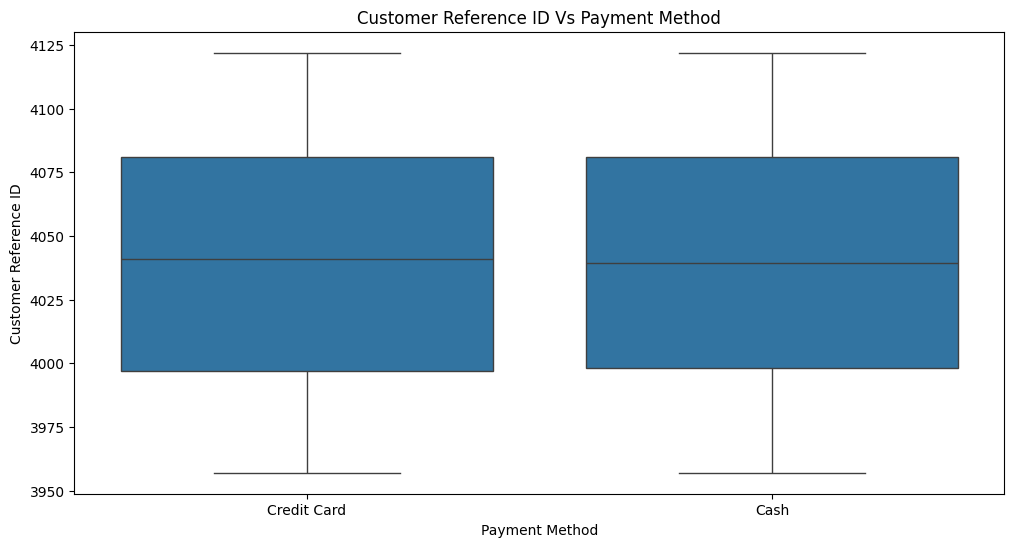

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Payment Method', y='Customer Reference ID', data=df_data)
plt.title('Customer Reference ID Vs Payment Method')
plt.show()

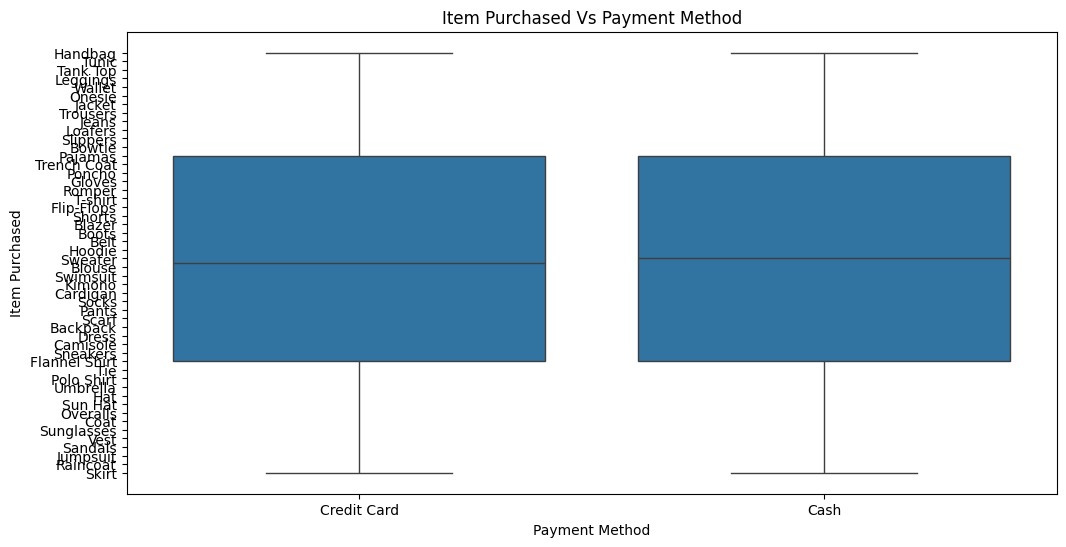

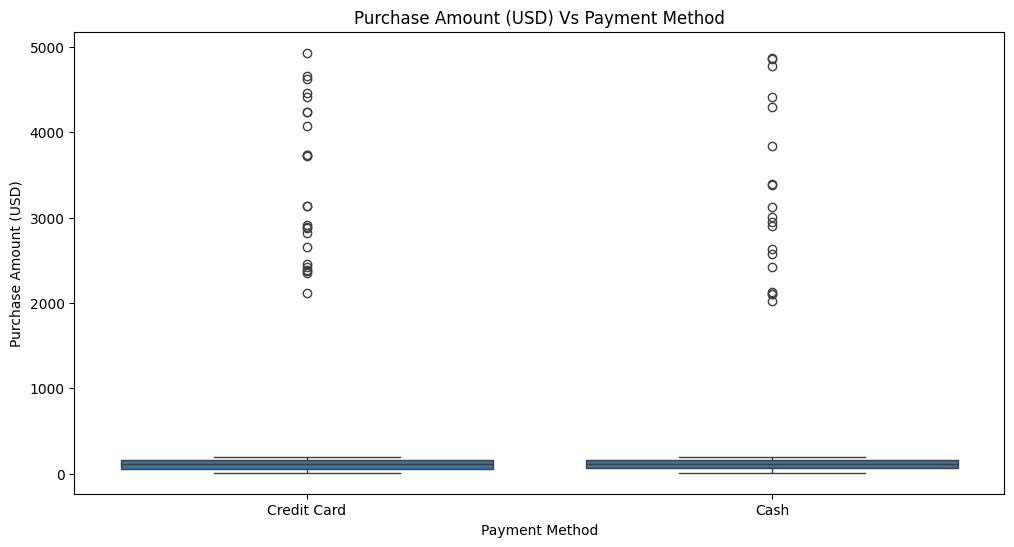

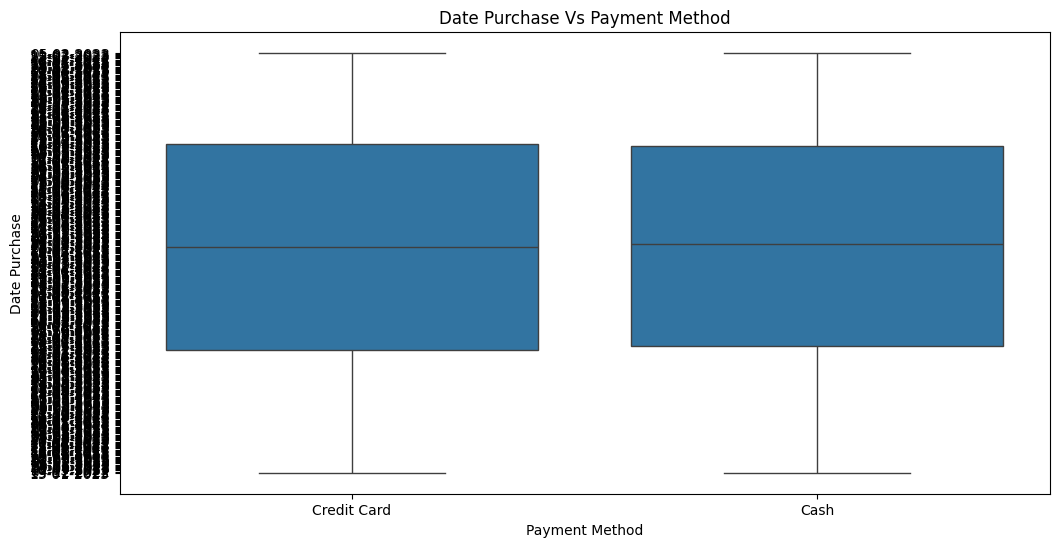

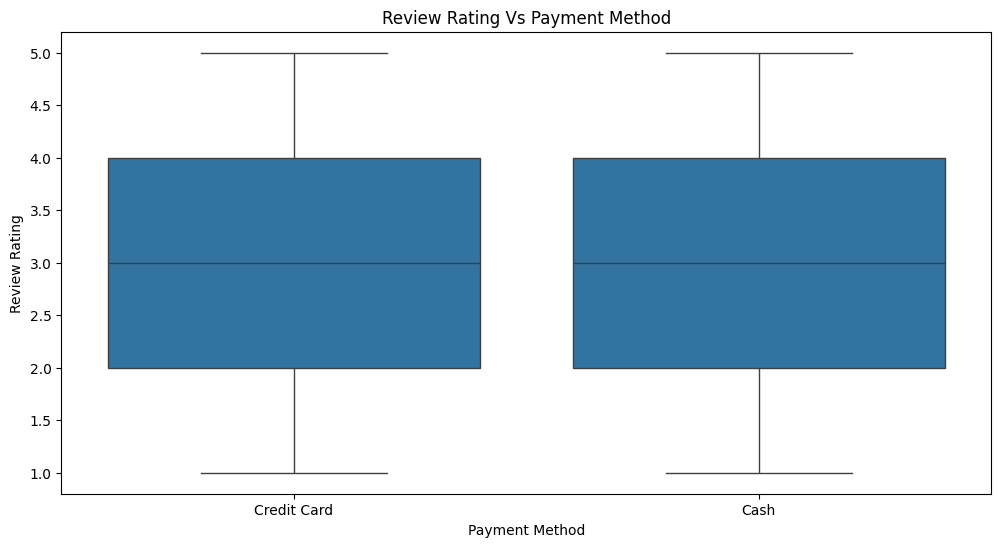

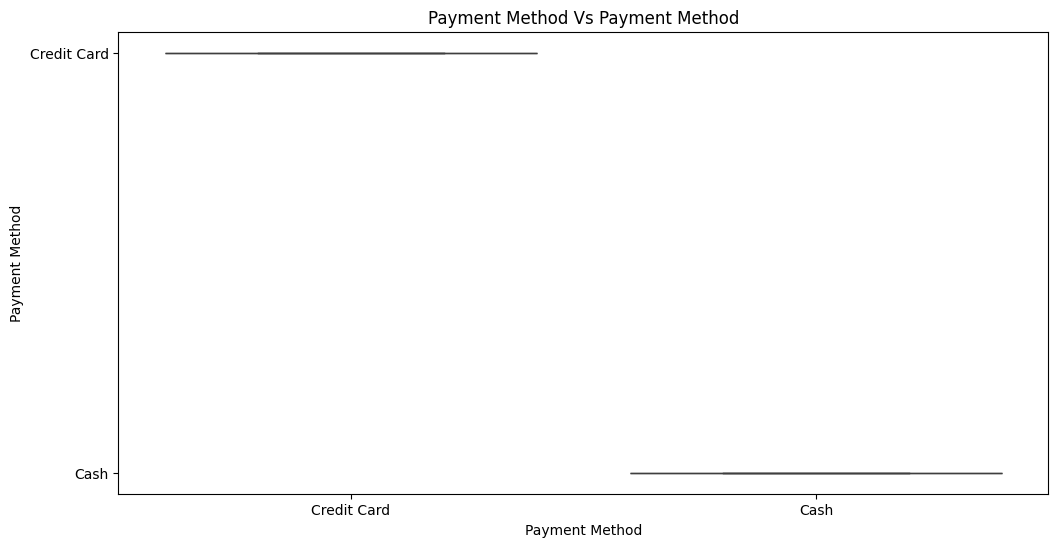

In [ ]:
for col in df_data.columns:
    if col != 'Customer Reference ID':
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='Payment Method', y=col, data=df_data)
        plt.title(f'{col} Vs Payment Method')
        plt.show()

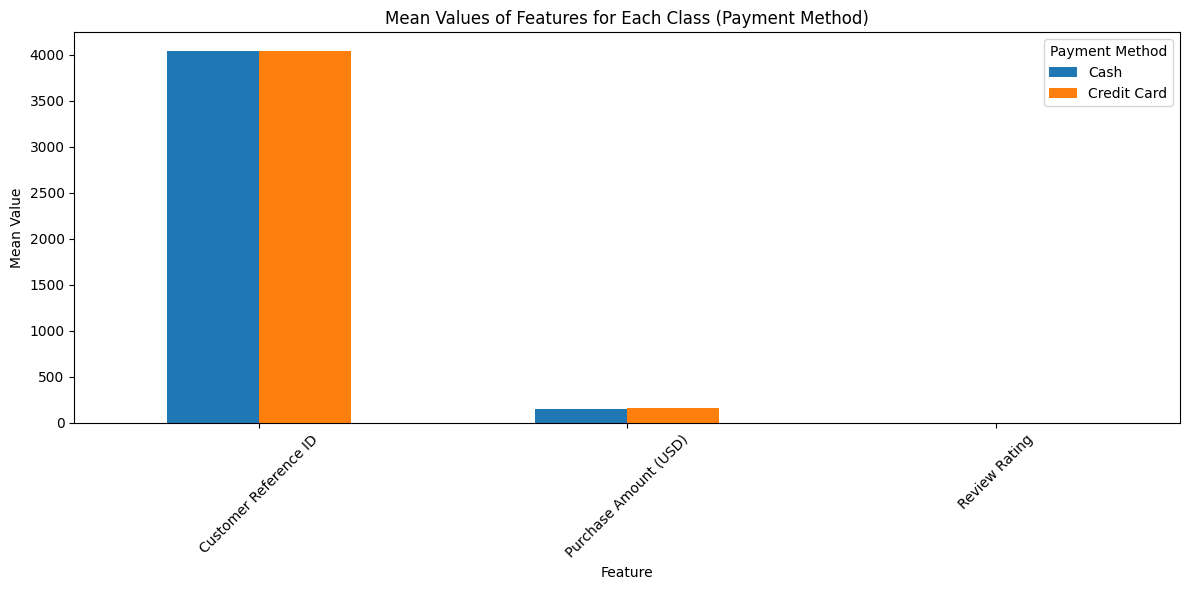

In [ ]:
grouped_stats = df_data.groupby('Payment Method')[df_data.select_dtypes(include=['number']).columns].mean().T
grouped_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Values of Features for Each Class (Payment Method)')
plt.ylabel('Mean Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

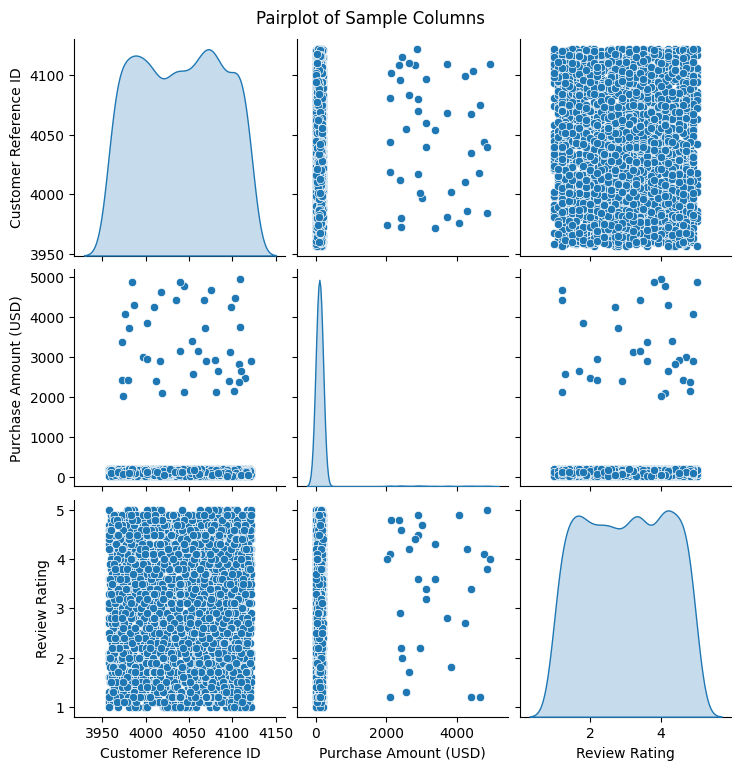

In [ ]:
sample_cols = ['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)', 'Date Purchase', 'Review Rating', 'Payment Method']
sns.pairplot(df_data[sample_cols], diag_kind='kde')
plt.suptitle('Pairplot of Sample Columns', y=1.02)
plt.show()

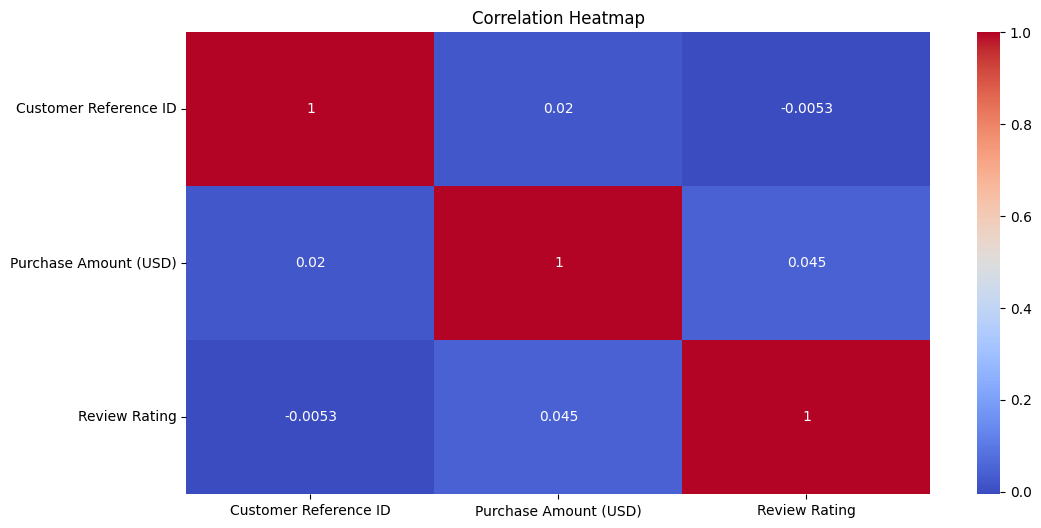

In [ ]:
numerical_data = df_data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()